# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [164]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [165]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [166]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,227
Treatment,171


col_0,Frequency
status,
Control,0.570352
Treatment,0.429648


<font size = "5">

Query with string conditions

In [167]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')


<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [168]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,23.141520,5.549708,198.140351,3033.660819,15.625146
std,8.045026,1.712115,104.783885,865.181526,2.804368
min,9.000000,3.000000,68.000000,1760.000000,8.500000
25%,16.950000,4.000000,105.000000,2231.000000,14.000000
50%,22.000000,6.000000,156.000000,2933.000000,15.500000
75%,28.900000,8.000000,302.000000,3740.000000,17.250000
max,46.600000,8.000000,454.000000,4955.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,23.795595,5.383260,189.876652,2922.788546,15.525110
std,7.644778,1.692849,103.969119,831.499408,2.727431
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,18.000000,4.000000,102.500000,2220.000000,13.550000
50%,23.000000,4.000000,140.000000,2720.000000,15.500000
75%,29.000000,6.000000,259.000000,3447.000000,17.000000
max,44.300000,8.000000,455.000000,5140.000000,23.700000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [169]:
def fn_compute_value(P,r,n,t):
    V = P*(1 + r/n)**(n*t)
    return(V)

V1 = fn_compute_value(P = 1000, r = 0.01, n = 20, t=10)
print(V1)

#or

def numeric_grade(grade):
    if (grade>=55):
        status="pass"
    else:
        status="fail"
    return(status)

print(numeric_grade(49))

#or

def fn_cars(first_name,last_name,car_model):
    return("Dear customer "+first_name+ " " + last_name + ", your car model " + car_model +" is ready")

print(fn_cars("Evan","Woska","Subaru"))


1105.1432983541217
fail
Dear customer Evan Woska, your car model Subaru is ready


In [170]:
#for apply

data  = pd.DataFrame([])

data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

data

fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)
data["num_siblings"] = list(map(fn_sum,
                                data["num_underage_siblings"],
                                data["num_adult_siblings"]))

data


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings
0,18,0,1,True,False,Adult,1
1,29,0,0,True,True,Adult,0
2,15,1,0,False,False,Adolescent,1
3,32,1,1,True,False,Adult,2
4,6,0,0,False,False,Child,0


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [171]:
data["age"].mean()
data["age"].median()
data["age"].std()

data_age_btw_10and20 = data.query("(age >= 10) & (age < 20)")
data_age_btw_10and20



,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings
0,18,0,1,True,False,Adult,1
2,15,1,0,False,False,Adolescent,1


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [172]:
datasorted = data.sort_values(by = "age", ascending = True)
display(datasorted)

#shows first 3
display(datasorted.iloc[[0,1,2],:])

#only shows first 2 line items
display(datasorted.iloc[0:2,:])

,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings
4,6,0,0,False,False,Child,0
2,15,1,0,False,False,Adolescent,1
0,18,0,1,True,False,Adult,1
1,29,0,0,True,True,Adult,0
3,32,1,1,True,False,Adult,2


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings
4,6,0,0,False,False,Child,0
2,15,1,0,False,False,Adolescent,1
0,18,0,1,True,False,Adult,1


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings
4,6,0,0,False,False,Child,0
2,15,1,0,False,False,Adolescent,1


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [177]:
list_status  = ["Treatment","Control"]
prop_status  = [0.5,0.5]
size_dataset = len(data)

data["status"] = np.random.choice(list_status,
                                    size = size_dataset,
                                    p = prop_status)

display(data)

data_treated = data.query('status == "Treatment" ')
data_control = data.query('status == "Control" ')

display(data_treated)
display(data_control)


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings,status
0,18,0,1,True,False,Adult,1,Control
1,29,0,0,True,True,Adult,0,Control
2,15,1,0,False,False,Adolescent,1,Treatment
3,32,1,1,True,False,Adult,2,Treatment
4,6,0,0,False,False,Child,0,Treatment


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings,status
2,15,1,0,False,False,Adolescent,1,Treatment
3,32,1,1,True,False,Adult,2,Treatment
4,6,0,0,False,False,Child,0,Treatment


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,num_siblings,status
0,18,0,1,True,False,Adult,1,Control
1,29,0,0,True,True,Adult,0,Control


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library

In [191]:
def fn(y,x,b0,b1):
    V = x*b0+y*b1
    return(V)


V1 = fn(y = 4, b0 = 1, b1= np.random.normal(loc = 0,scale = 1, size = 50), x=np.random.normal(loc = 0,scale = 1, size = 50))
print(V1)



[ 2.36936665 -2.01892319  1.40610157 -1.98001244  1.59173675 -1.33935119
  3.04307436  3.76497663  3.32874334 -6.24908143  3.34729439 -0.78429892
  6.59049451  1.66104747  8.39293226  3.6500507  -5.45646597 -2.98635614
  0.0803401  -1.92424548  0.93515921  3.59816931 -8.10695994 -1.04459152
 -4.34833532 -1.51079757 -8.34379202  3.27437593  0.05337582 -1.22484502
 -4.79422428 -0.73192544 -4.41560726  5.62947981 -3.30876033 -2.18850285
  4.20685208  4.75140762  0.02491283 -0.44577963 -2.95173142  0.2228596
 -2.47042662 -2.34832401 -2.7060101  -4.87342617 -0.89896226 -6.0224734
  3.66018356 -2.57085259]


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 1.0, 'Age based on Treatment Status')

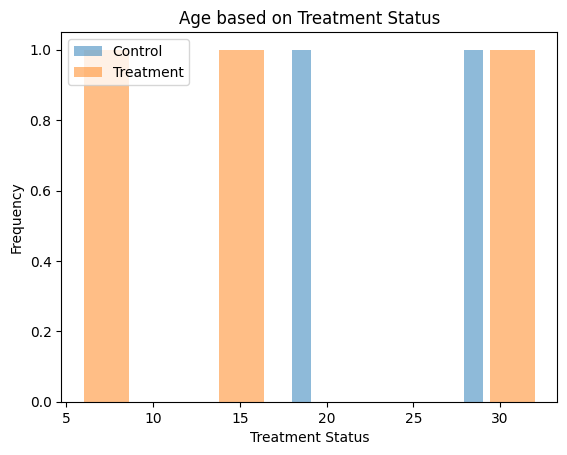

In [186]:
Treated_or_untreated =  pd.unique(data["status"])

for data_status in Treated_or_untreated:
    temporarydataframe = data.query("status == @data_status")
    plt.hist(temporarydataframe["age"],alpha = 0.5)

plt.legend(labels = Treated_or_untreated)
plt.xlabel("Treatment Status")
plt.ylabel("Frequency")
plt.title("Age based on Treatment Status")

Text(0.5, 1.0, 'Age based on number of siblings')

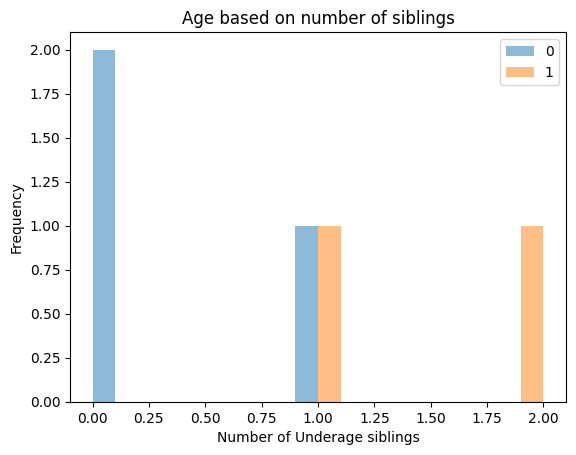

In [183]:
list_underage_siblings =  pd.unique(data["num_underage_siblings"])

for category_value in list_underage_siblings:
    temporarydataframe = data.query("num_underage_siblings == @category_value")
    plt.hist(temporarydataframe["num_siblings"],alpha = 0.5)

plt.legend(labels = list_underage_siblings)
plt.xlabel("Number of Underage siblings")
plt.ylabel("Frequency")
plt.title("Age based on number of siblings")

